In [114]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt



In [115]:
df = pd.read_csv("cluster_data.csv")

In [116]:

df.head()

,Name,Age,Salary
0,Jared,44,52836
1,Marie,28,72103
2,Elijah,43,108011
3,Sheryl,42,106042
4,Jeremy,29,84639


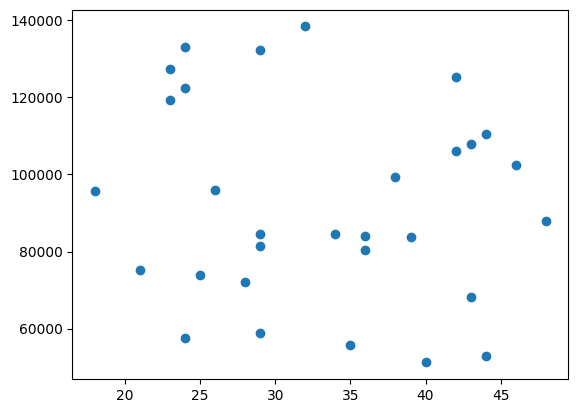

In [117]:
plt.scatter(df['Age'], df['Salary'])

In [118]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(df[['Salary']])
df['Salary'] = min_max.transform(df[['Salary']])
min_max.fit(df[['Age']])
df['Age'] = min_max.transform(df[['Age']])
df

,Name,Age,Salary
0,Jared,0.866667,0.018822
1,Marie,0.333333,0.239678
2,Elijah,0.833333,0.651287
3,Sheryl,0.800000,0.628717
4,Jeremy,0.366667,0.383377
5,Frank,0.266667,0.513171
6,Rickey,1.000000,0.422442
7,Barry,0.366667,0.088001
8,Carl,0.166667,0.782056
9,Pam,0.166667,0.873324


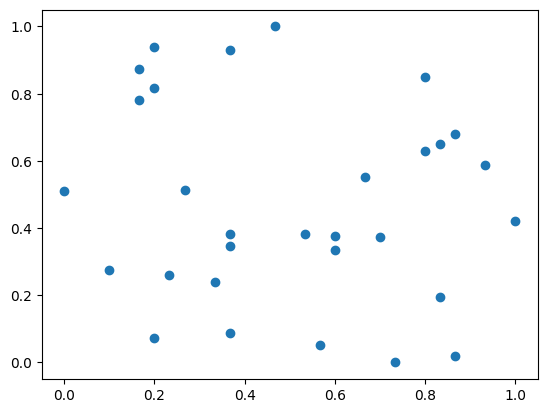

In [119]:
plt.scatter(df['Age'], df['Salary'])


In [120]:
model = KMeans(n_clusters=3)


In [123]:
model.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

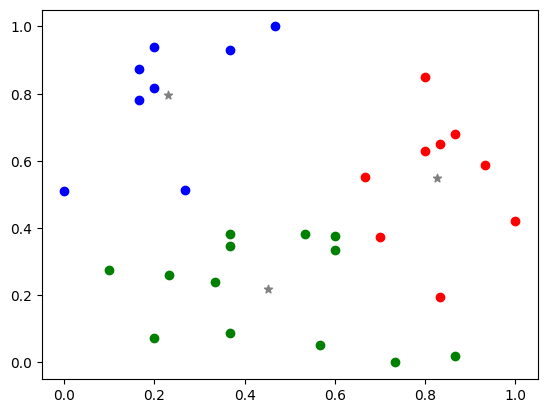

In [ ]:
cluster_data = model.fit_predict(df[['Age', 'Salary']])
df['cluster'] = cluster_data

df0 = df[df.cluster == 0]

df1 = df[df.cluster == 1]

df2 = df[df.cluster == 2]

# scaler = MinMaxScaler()
# df.loc[df.cluster == 0, 'Salary'] = scaler.fit_transform(df.loc[df.cluster == 0, ['Salary']])
# df.loc[df.cluster == 1, 'Salary'] = scaler.fit_transform(df.loc[df.cluster == 1, ['Salary']])
# df.loc[df.cluster == 2, 'Salary'] = scaler.fit_transform(df.loc[df.cluster == 2, ['Salary']])

plt.scatter(df0['Age'], df0['Salary'], color = 'green')
plt.scatter(df1['Age'], df1['Salary'], color = 'blue')
plt.scatter(df2['Age'], df2['Salary'], color = 'red')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'grey', marker='*')



In [ ]:
k_range = range(1,11)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age', 'Salary']])
    sse.append(km.inertia_)
sse

[4.927180343905575,
 3.069531075966882,
 1.6326365313708138,
 1.0477916430335998,
 0.7122858914845571,
 0.5602357602774699,
 0.4990490914431266,
 0.3857336987028176,
 0.31940385386042935,
 0.2980913847270044]

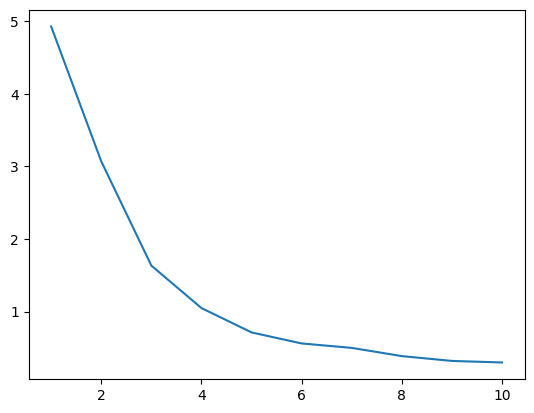

In [ ]:
plt.plot(k_range, sse)
plt.show()